In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
#from petitRADTRANS import Radtrans
#from petitRADTRANS import nat_cst as nc
mpl.rcParams['figure.dpi'] = 200
%matplotlib inline

## Analyze Individual Evaluation Data of Certain Model Configurations

- Plot Individual Test Spectra + Errors
- Error Correlations with Atmospheric Parameters for Certain Model
    - of RMSE
    - of Mean (and StD)
- Errors "Spectra" of Certain Model
    - of RMSE
    - of Mean (and StD)

In [2]:
true_transm = pd.read_hdf('../data/test_data_pinns.h5', key='transm')
atm_params = pd.read_hdf('../data/test_data_pinns.h5', key='params')

signal_strength = true_transm.values.max(axis=1) - true_transm.values.min(axis=1)

name = 'IsothermalAtmoAlt_4x64_100x50_seed='

pinn_transm = []
errors = []
rel_errors = []

for i in range(7):
    eval_filename = '../data/HPsearch/eval_data/eval_' + name + f'{i+1}.h5'
    #print(eval_filename)
    pinn_transm.append(pd.read_hdf(eval_filename, key='transm'))
    errors.append(pd.read_hdf(eval_filename, key='error'))
    
    rel_errors.append(errors[i].values / signal_strength[:,None])

r_jup_mean = 69.911e6 * 1e2
c = 3e8 * 1e2

FileNotFoundError: File ../data/test_data_pinns.h5 does not exist

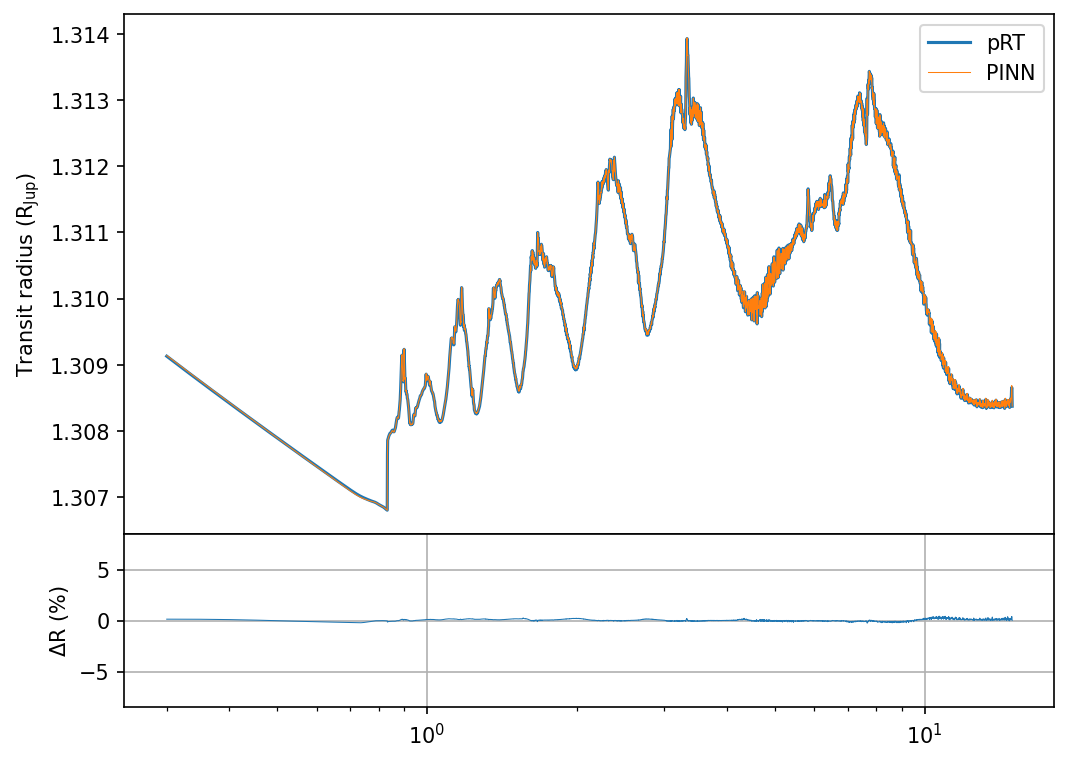

T           1110.670517
log(H2O)     -11.569942
log(CO)       -3.986916
log(CO2)      -8.584406
log(CH4)      -3.252596
R_pl           1.309548
He/H2          0.298235
log(g)         1.947023
Name: 44, dtype: float64
0.11158637467456253


<Figure size 1280x960 with 0 Axes>

In [ ]:
model = 3 # index/seed of model in range [1,7]
ind = 44 # index of test spectrum to display

fig, ax = plt.subplots(2,1, figsize=(8,6), sharex=True, gridspec_kw={'height_ratios': [3, 1]}, dpi=150)

ax[0].plot(true_transm.columns, true_transm.iloc[ind,:]/r_jup_mean, label='pRT')
ax[0].plot(true_transm.columns, pinn_transm[model-1].iloc[ind,:]/r_jup_mean, label='PINN', linewidth=0.5)

ax[0].set_xscale('log')
ax[0].set_xlabel('Wavelength (microns)')
ax[0].set_ylabel(r'Transit radius ($\rm R_{Jup}$)')
ax[0].legend()

#ax[0].hlines(atmosphere.radius_hse/nc.r_jup_mean, xmin=(nc.c/atmosphere.freq/1e-4).min(), xmax=(nc.c/atmosphere.freq/1e-4).max(),
#            color='black', linewidth=0.1)

ax[1].plot(true_transm.columns, rel_errors[model-1][ind,:]*100, linewidth=0.5)

ax[1].set_ylabel(r'$\Delta$R (%)')
ax[1].set_ylim((-8.5, 8.5))
#ax[1].set_yticks(np.linspace(-2,2,5))

plt.grid()
plt.subplots_adjust(hspace=.0)
plt.show()
plt.clf()

print(atm_params.iloc[ind])
print(np.sqrt(np.mean((rel_errors[model-1][ind,:]*100)**2)))

In [ ]:
mask = np.ones(100, dtype=bool)
# exclude 5 of the 100 test spectra, that have R_P <= 2 R_J
mask = atm_params.iloc[:,5]>0.2
print(np.arange(100)[~mask], np.sum(mask))

for i in range(7):
    print(f'seed = {i+1}')
    sq_mean_rel_error = np.sqrt(np.mean(rel_errors[i]**2, axis=1))[mask]
    print('Min Error: ', np.argsort(sq_mean_rel_error)[:5])
    print('Max Error: ', np.argsort(sq_mean_rel_error)[-5:])
    print('Mean Error: ', np.round(np.mean(sq_mean_rel_error)*100, 2), '+-', np.round(np.std(sq_mean_rel_error)*100, 2), '%')

[ 1  7 45 51 68] 95
seed = 1
Min Error:  [46 34 36 79 42]
Max Error:  [58  0 89 38  5]
Mean Error:  0.34 +- 0.17 %
seed = 2
Min Error:  [42 23 36 34 50]
Max Error:  [ 9 80 70 29  3]
Mean Error:  0.49 +- 0.25 %
seed = 3
Min Error:  [42 46  6 34 85]
Max Error:  [ 3 30  0 81  5]
Mean Error:  0.38 +- 0.17 %
seed = 4
Min Error:  [34 14 23  4 46]
Max Error:  [58 80  3  5 70]
Mean Error:  0.48 +- 0.27 %
seed = 5
Min Error:  [56 34 50 64 42]
Max Error:  [ 0 15 30 70  5]
Mean Error:  0.51 +- 0.27 %
seed = 6
Min Error:  [46 23 42 50 79]
Max Error:  [57 80 30 19  5]
Mean Error:  0.44 +- 0.21 %
seed = 7
Min Error:  [34 42 25 84 56]
Max Error:  [75  5 30 70 19]
Mean Error:  0.32 +- 0.2 %


In [ ]:
for i in range(7):
    print(f'seed = {i+1}')
    mean_rel_error = np.mean(rel_errors[i], axis=1)[mask]
    std_rel_error  =  np.std(rel_errors[i], axis=1)[mask]
    print('Mean Error: ', np.round(np.mean(mean_rel_error)*100, 2), '+-', np.round(np.mean(std_rel_error)*100, 2), '%')

seed = 1
Mean Error:  0.14 +- 0.27 %
seed = 2
Mean Error:  0.33 +- 0.31 %
seed = 3
Mean Error:  0.14 +- 0.31 %
seed = 4
Mean Error:  0.24 +- 0.32 %
seed = 5
Mean Error:  0.25 +- 0.42 %
seed = 6
Mean Error:  0.24 +- 0.31 %
seed = 7
Mean Error:  0.13 +- 0.26 %


[ 1  7 45 51 68] 95
Min Error:  [42 46  6 34 85]
Max Error:  [ 3 30  0 81  5]
Mean Error:  0.38 +- 0.17 %
58    1.733030
57    1.883884
19    1.277916
29    1.597066
71    0.506017
3     0.286859
30    1.955842
0     0.275443
81    1.737736
5     0.646773
Name: R_pl, dtype: float64


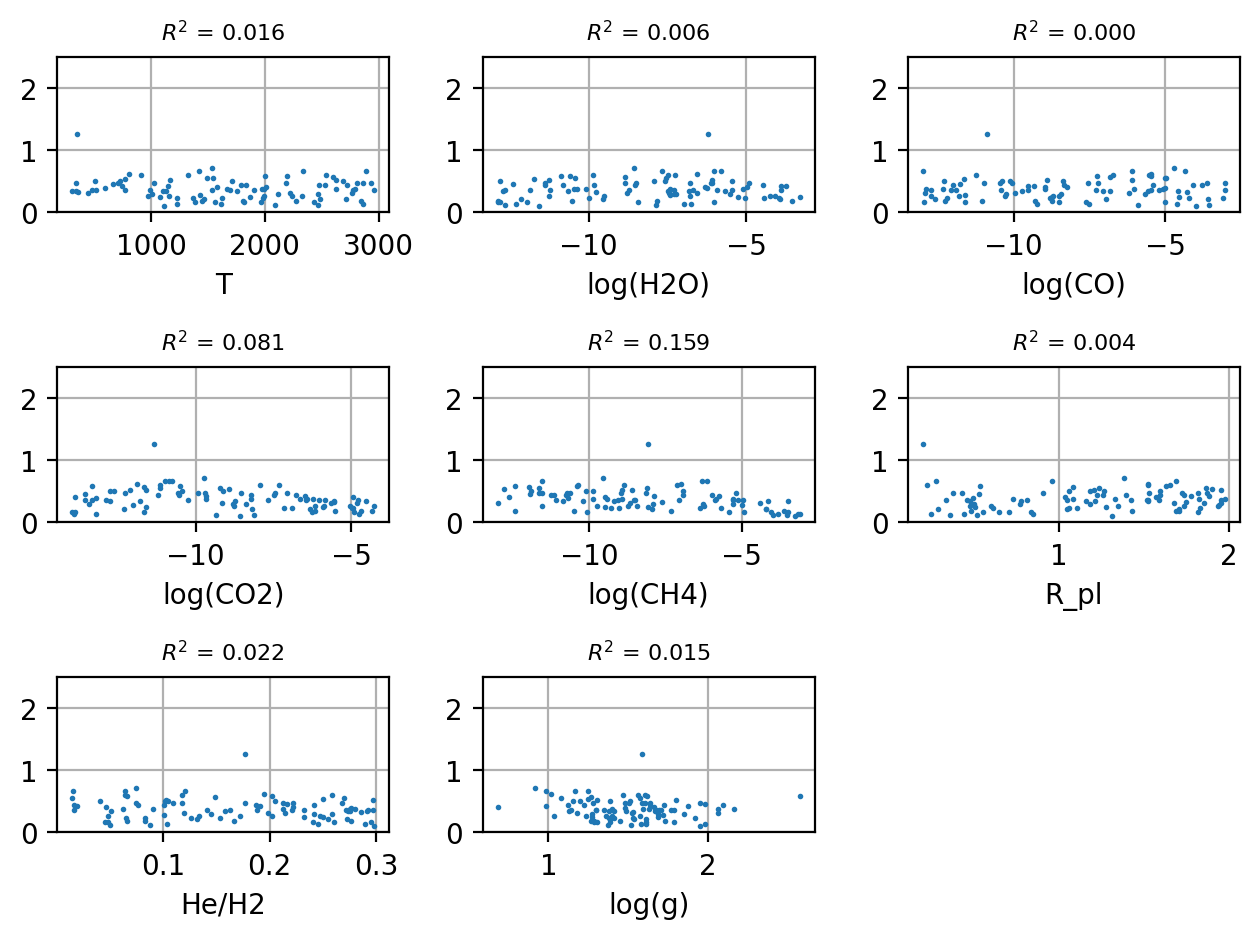

In [ ]:
# Correlation with atmospheric parameters
model = 3 # seed of model
ind = model - 1 # convert to index

mask = np.ones(100, dtype=bool)
# exclude 5 of the 100 test spectra, that have R_P <= 2 R_J
mask = atm_params.iloc[:,5]>0.2
print(np.arange(100)[~mask], np.sum(mask))

sq_mean_rel_error = np.sqrt(np.mean(rel_errors[ind]**2, axis=1))[mask]
print('Min Error: ', np.argsort(sq_mean_rel_error)[:5])
print('Max Error: ', np.argsort(sq_mean_rel_error)[-5:])
print('Mean Error: ', np.round(np.mean(sq_mean_rel_error)*100, 2), '+-', np.round(np.std(sq_mean_rel_error)*100, 2), '%')

print(atm_params.iloc[np.argsort(sq_mean_rel_error)[-10:],5])

fig, axes = plt.subplots(3,3)
axes = axes.flatten()

for i, param in enumerate(atm_params.columns):
    r_sq = np.corrcoef(atm_params[param][mask], sq_mean_rel_error)[0,1]**2
    axes[i].plot(atm_params[param][mask], sq_mean_rel_error*100, '.', markersize=2.0)
    #mask = atm_params.values[:,5] < 0.3
    #axes[i].plot(atm_params[param][mask], sq_mean_rel_error[mask]*100, '.', markersize=2.0)
    # ind = np.argsort(sq_mean_rel_error)[:5]
    # axes[i].plot(atm_params[param][ind], sq_mean_rel_error[ind]*100, '.', markersize=2.0, color='red')
    axes[i].set_xlabel(param)
    axes[i].set_title(f'$R^2$ = {r_sq:.03f}', fontsize=8)
    #axes[i].set_ylim((0,10))
    #axes[i].set_yticks([0,5,10])
    axes[i].set_ylim((0,2.5))
    axes[i].set_yticks([0,1,2])
    axes[i].grid()
    
axes[-1].axis('off')
#r_sq = np.corrcoef(signal_strength/nc.r_jup_mean, sq_mean_rel_error)[0,1]**2
#axes[-1].plot(signal_strength/nc.r_jup_mean, sq_mean_rel_error*100, '.', markersize=2.0)
#axes[-1].plot(signal_strength[mask]/nc.r_jup_mean, sq_mean_rel_error[mask]*100, '.', markersize=2.0)
#axes[-1].set_xlabel(r'$\Delta R (R_{Jup})$')
#axes[-1].set_title(f'$R^2$ = {r_sq:.03f}', fontsize=8)
#axes[-1].set_ylim((0,10))
#axes[-1].grid()

fig.tight_layout()
#fig.savefig('images/error_correlations_' + name + '.png', dpi=300)

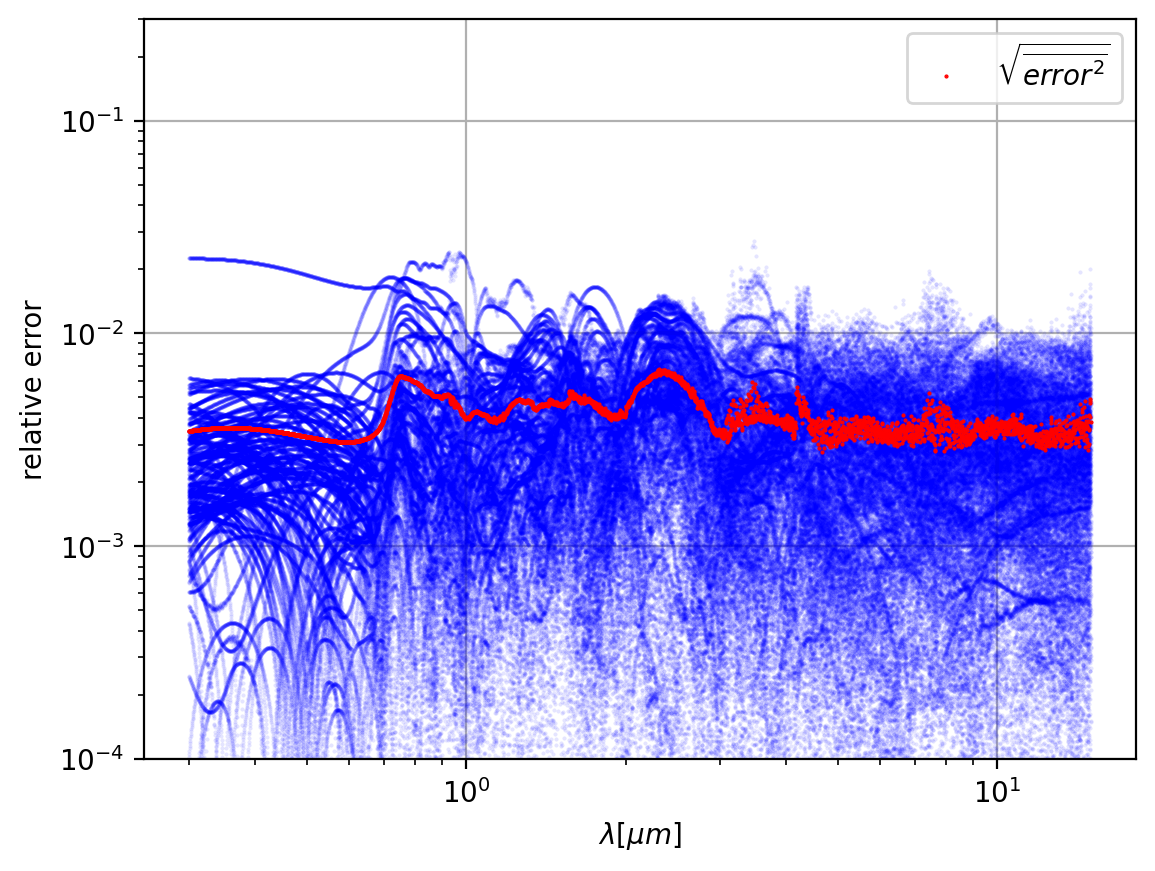

In [ ]:
# Correlation with wavelengths

sq_mean_rel_error_wl = np.sqrt(np.mean(rel_errors[ind][mask]**2, axis=0))
#print('Min Error: ', true_transm.columns[np.argsort(sq_mean_rel_error_wl)[:5]].values)
#print('Max Error: ', true_transm.columns[np.argsort(sq_mean_rel_error_wl)[-5:]].values)

# plt.grid()
plt.plot(true_transm.columns, np.abs(rel_errors[ind][mask]).swapaxes(0,1), '.', markersize=1.0, c='blue', alpha=0.1)
plt.plot(true_transm.columns, sq_mean_rel_error_wl, '.', markersize=1.0, c='red', label=r'$\sqrt{\overline{error^2}}$')
plt.xscale('log')
plt.yscale('log')
plt.ylim((1e-4, 3e-1))
plt.xlabel(r'$\lambda [\mu m]$')
plt.ylabel(r'relative error')
plt.grid()
plt.legend()
#plt.savefig('images/error_spectrum_' + name + '.png', dpi=300)
plt.show()

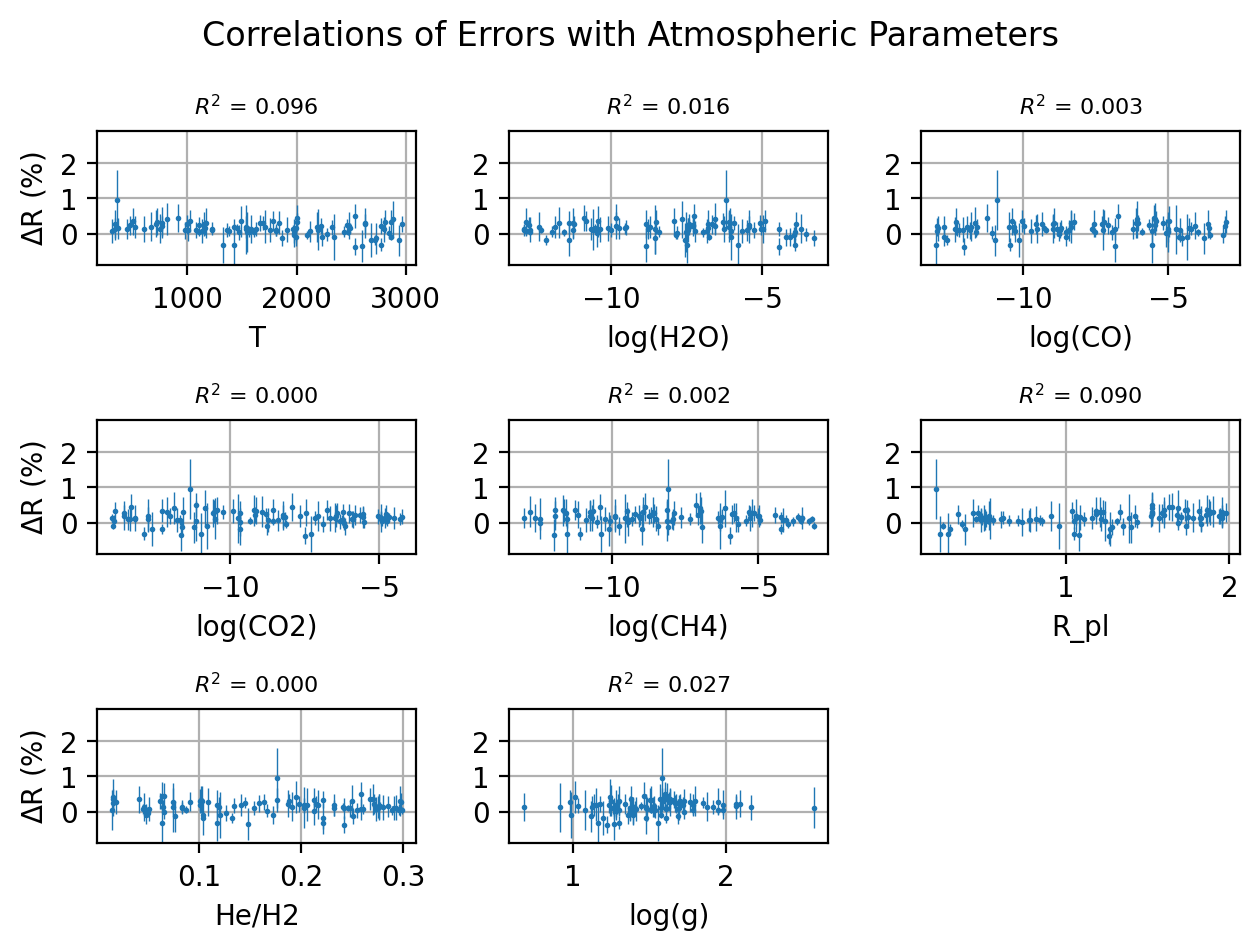

In [ ]:
# Correlation with atmospheric parameters

#mask = np.ones(100, dtype=bool)
#mask = atm_params.iloc[:,5]>0.2
#print(np.arange(100)[~mask])

sq_mean_rel_error = (np.mean(rel_errors[ind], axis=1))[mask]
std_error = (np.std(rel_errors[ind], axis=1))[mask]
#print('Min Error: ', np.argsort(sq_mean_rel_error)[:5])
#print('Max Error: ', np.argsort(sq_mean_rel_error)[-5:])
#print('Mean Error: ', np.round(np.mean(sq_mean_rel_error)*100, 2), '+-', np.round(np.std(sq_mean_rel_error)*100, 2), '%')

#print(atm_params.iloc[np.argsort(sq_mean_rel_error)[-10:],5])

fig, axes = plt.subplots(3,3)
axes = axes.flatten()

for i, param in enumerate(atm_params.columns):
    r_sq = np.corrcoef(atm_params[param][mask], sq_mean_rel_error)[0,1]**2
    axes[i].errorbar(atm_params[param][mask], sq_mean_rel_error*100, yerr=std_error*100, fmt='.', markersize=2.0, elinewidth=0.5)
    #mask = atm_params.values[:,5] < 0.3
    #axes[i].plot(atm_params[param][mask], sq_mean_rel_error[mask]*100, '.', markersize=2.0)
    # ind = np.argsort(sq_mean_rel_error)[:5]
    # axes[i].plot(atm_params[param][ind], sq_mean_rel_error[ind]*100, '.', markersize=2.0, color='red')
    axes[i].set_xlabel(param)
    axes[i].set_title(f'$R^2$ = {r_sq:.03f}', fontsize=8)
    axes[i].set_ylim((-0.9,2.9))
    axes[i].set_yticks([0,1,2])
    axes[i].grid()
    if i%3 == 0:
        axes[i].set_ylabel(r'$\Delta$R (%)')
    
axes[-1].axis('off')
#r_sq = np.corrcoef(signal_strength/nc.r_jup_mean, sq_mean_rel_error)[0,1]**2
#axes[-1].plot(signal_strength/nc.r_jup_mean, sq_mean_rel_error*100, '.', markersize=2.0)
#axes[-1].plot(signal_strength[mask]/nc.r_jup_mean, sq_mean_rel_error[mask]*100, '.', markersize=2.0)
#axes[-1].set_xlabel(r'$\Delta R (R_{Jup})$')
#axes[-1].set_title(f'$R^2$ = {r_sq:.03f}', fontsize=8)
#axes[-1].set_ylim((0,10))
#axes[-1].grid()
fig.suptitle('Correlations of Errors with Atmospheric Parameters')
fig.tight_layout()
# fig.savefig('images/error_correlations_' + name + '.png', dpi=300)

Min Error:  [0.74544342 0.74321044 0.7469358  0.74768311 0.74469835]
Max Error:  [2.39461858 2.35660957 2.29842467 2.29383241 2.30302612]


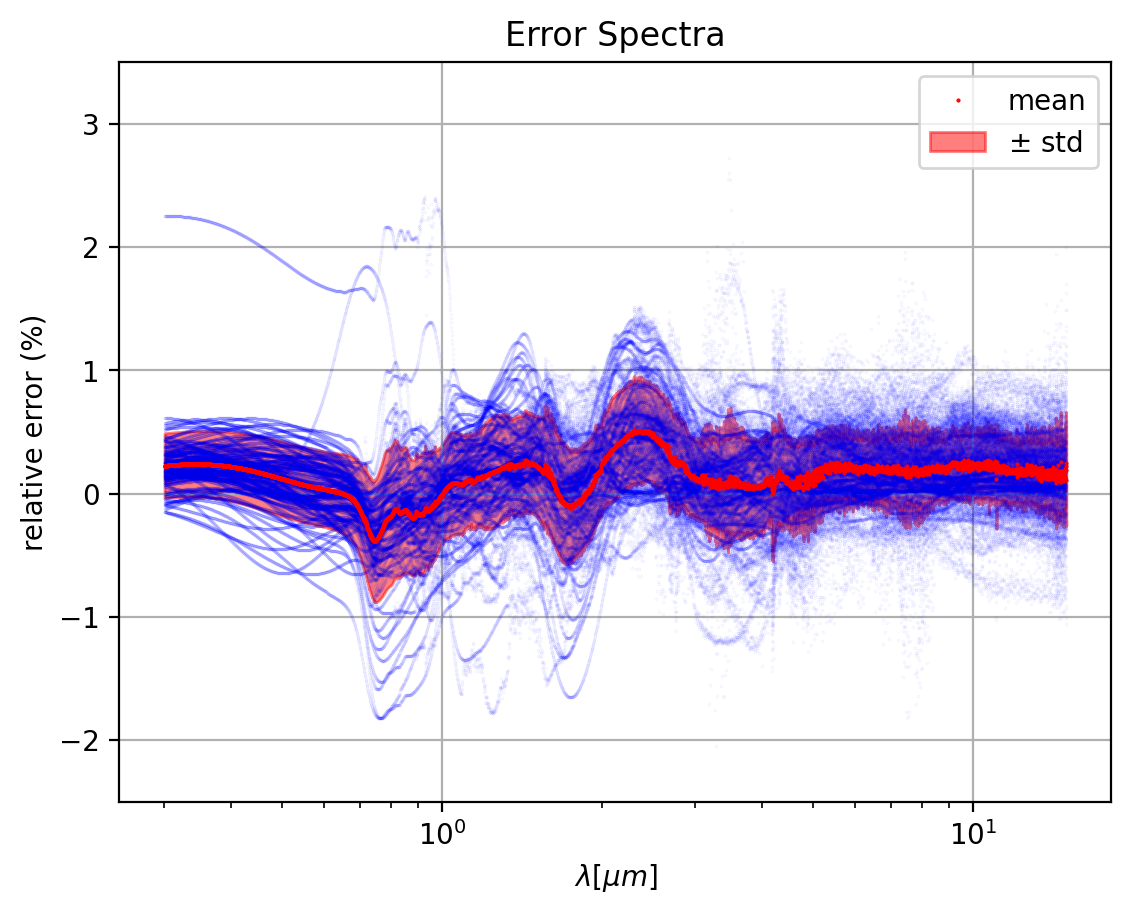

In [ ]:
# Correlation with wavelengths

sq_mean_rel_error_wl = np.mean(rel_errors[ind][mask], axis=0)
std_error = np.std(rel_errors[ind][mask], axis=0)
print('Min Error: ', true_transm.columns[np.argsort(sq_mean_rel_error_wl)[:5]].values)
print('Max Error: ', true_transm.columns[np.argsort(sq_mean_rel_error_wl)[-5:]].values)

# plt.grid()
plt.plot(true_transm.columns, rel_errors[ind][mask].swapaxes(0,1)*100, '.', markersize=0.5, c='blue', alpha=0.06)
plt.plot(true_transm.columns, sq_mean_rel_error_wl*100, '.', markersize=1.0, c='red', label=r'mean')
plt.fill_between(true_transm.columns, (sq_mean_rel_error_wl-std_error)*100, y2=(sq_mean_rel_error_wl+std_error)*100, color='red', alpha=0.5, label=r'$\pm$ std')
plt.xscale('log')
# plt.yscale('log')
plt.ylim((-2.5, 3.5))
plt.xlabel(r'$\lambda [\mu m]$')
plt.ylabel(r'relative error (%)')
plt.grid()
plt.legend()
# plt.savefig('images/error_spectrum_' + name + '.png', dpi=300)
plt.title('Error Spectra')
plt.show()